In [1]:
import glob, os, h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

# Reading the file directly from here

In [10]:
fg = pd.read_csv('candidate.csv')

In [11]:
bg = pd.read_csv('background.csv')

# Making a figure for the paper:

Text(0, 0.5, 'Number of events / Obs')

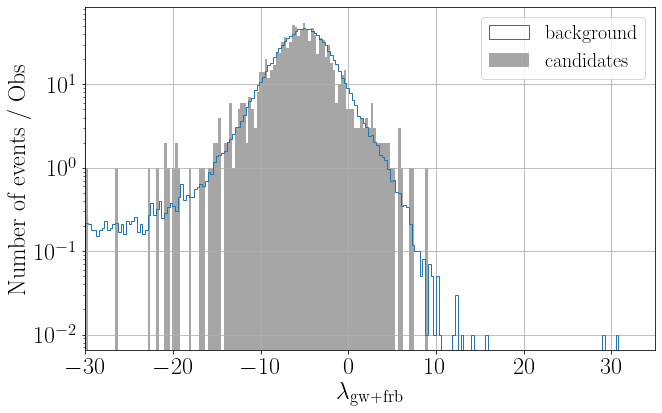

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

bgranking = bg['ranking']
fgranking = fg['ranking']

low=-30
bins = np.linspace(low,np.max(bgranking)+1,200)
counts, _ = np.histogram(bgranking,bins=bins)

ax.hist(bins[:-1], bins, weights=counts/100,histtype="step",label='background')
ax.hist(fgranking,bins=bins,alpha=0.7,color='grey',label='candidates')
ax.set_yscale('log')
ax.legend()
ax.set_xlim(-30,35)
ax.set_xlabel('$\lambda_\mathrm{gw+frb}$')
ax.set_ylabel('Number of events / Obs')
#fig.savefig('newstat.png',bbox_inches='tight')

# FAR

In [13]:
for i in range(3):
    print('stat:', fg['ranking'].values[i])
    higherbg = bg[bg['ranking']>=fg['ranking'].values[i]]
    print( len (higherbg) / 100)

stat: 8.922940943390131
0.29
stat: 7.506948210299015
0.63
stat: 6.950599300907924
0.93
